Resolvendo um problema de regressão linear: Tarefa 2 da disciplina Reconhecimento de Padrões. 

Professor: Francisco de Assis Boldt 

Aluno: Diogo de Santana Candido

In [37]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())



Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.10


1. Carregue uma base de dados de regressão que NÃO esteja nos toy datasets do scikit-learn;

Foi escolhido o Datasets "fetch_california_housing - Real World Datasets", seus metadados podem ser obtidos em https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing

In [38]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
X, y = california.data, california.target
print(california.DESCR)
print(X.shape, y.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

2. Treine um modelo da classe LinearRegression do scikit-learn com toda a base;

In [39]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X, y)
ypred =  modelo.predict(X)
intercept_ypred = modelo.intercept_
coef_ypred = modelo.coef_
print("Valor do Intercept: ", intercept_ypred)
print("Valor dos coeficientes da Regressão Linear: ", coef_ypred)


Valor do Intercept:  -36.94192020718441
Valor dos coeficientes da Regressão Linear:  [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


3. Calcule o MSE (erro quadrático médio) para todos os exemplos da base usada como treino no modelo treinado (resubstituição);

In [40]:
from sklearn.metrics import mean_squared_error

mse_ypred = mean_squared_error(y, ypred)
print("Valor MSE: ", mse_ypred)


Valor MSE:  0.5243209861846072


4. Plote em um gráfico (2D) o MSE em função do atributo intercept_ da classe LinearRegression. Mantenha os valores do atributo coef_ fixos e varie o valor de intercept_ entre intercept_ - delta e intercept_ + delta. O gráfico tem que ser uma parábola com concavidade para cima. Não plote um gráfico 3D com visão de cima.

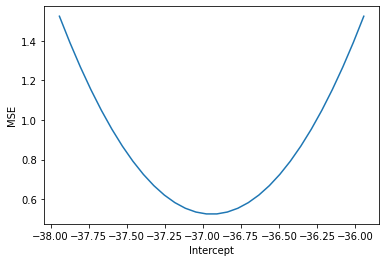

In [41]:
import numpy as np
import matplotlib.pyplot as plt

delta = 1
iteracoes = 30
intercept_range = np.linspace(intercept_ypred - delta, intercept_ypred + delta , iteracoes)

mse = []

for i in range(iteracoes):
    modelo.intercept_ = intercept_range[i]
    ypred =  modelo.predict(X)
    mse.append(mean_squared_error(y, ypred))

plt.ylabel("MSE")
plt.xlabel("Intercept")
plt.plot(intercept_range, mse)
plt.show()
